# Real Estate
## Course-end Project 1

### Description

A banking institution requires actionable insights into mortgage-backed securities, geographic business investment, and real estate analysis. 
The mortgage bank would like to identify potential monthly mortgage expenses for each region based on monthly family income and rental of the real estate.
A statistical model needs to be created to predict the potential demand in dollars amount of loan for each of the region in the USA. Also, there is a need to create a dashboard which would refresh periodically post data retrieval from the agencies.
The dashboard must demonstrate relationships and trends for the key metrics as follows: number of loans, average rental income, monthly mortgage and owner’s cost, family income vs mortgage cost comparison across different regions. The metrics described here do not limit the dashboard to these few.
Dataset Description

 

### Variables

#### Description

* Second mortgage	Households with a second mortgage statistics

* Home equity	Households with a home equity loan statistics

* Debt	Households with any type of debt statistics

* Mortgage Costs	Statistics regarding mortgage payments, home equity loans, utilities, and property taxes

* Home Owner Costs	Sum of utilities, and property taxes statistics

* Gross Rent	Contract rent plus the estimated average monthly cost of utility features

* High school Graduation	High school graduation statistics

* Population Demographics	Population demographics statistics

* Age Demographics	Age demographic statistics

* Household Income	Total income of people residing in the household

* Family Income	Total income of people related to the householder



### Project Task: Week 1

#### Data Import and Preparation:

* Import data. 

* Figure out the primary key and look for the requirement of indexing.
 
* Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

#### Exploratory Data Analysis (EDA):

* Perform debt analysis. You may take the following steps:

* Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

##### Use the following bad debt equation:

        Bad Debt = P (Second Mortgage ∩ Home Equity Loan)
        Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage
        Create pie charts  to show overall debt and bad debt

* Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

* Create a collated income distribution chart for family income, house hold income, and remaining income

* Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements): 

* Use pop and ALand variables to create a new field called population density

* Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age

* Visualize the findings using appropriate chart type

* Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

* Analyze the married, separated, and divorced population for these population brackets

* Visualize using appropriate chart type

* Please detail your observations for rent as a percentage of income at an overall level, and for different states.

* Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

 

### Project Task: Week 2

#### Data Pre-processing:

* The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 

* Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data. 
* 
##### Following are the list of latent variables:

            * Highschool graduation rates

            * Median population age

            * Second mortgage statistics

            * Percent own

            * Bad debt expense

 

#### Data Modeling :

* Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. 

       Please refer deplotment_RE.xlsx. Column hc_mortgage_mean is predicted variable. This is the mean monthly mortgage and owner costs of specified geographical location.

       Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean. 

       a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

       b) Run another model at State level. There are 52 states in USA.

       c) Keep below considerations while building a linear regression model:

* Variables should have significant impact on predicting Monthly mortgage and owner costs

* Utilize all predictor variable to start with initial hypothesis

* R square of 60 percent and above should be achieved

* Ensure Multi-collinearity does not exist in dependent variables

* Test if predicted variable is normally distributed

 

#### Data Reporting:


* Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

* Box plot of distribution of average rent by type of place (village, urban, town, etc.).

* Pie charts to show overall debt and bad debt.

* Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map.

* Heat map for correlation matrix.

* Pie chart to show the population distribution across different types of places (village, urban, town etc.).

# Data Import and Preparation:

## Question 1
### Import data. 


In [ ]:
! pip install numpy pandas scikit-learn matplotlib seaborn plotly dash factor-analyzer

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from dash import Dash, html, dcc, callback, Output, Input
import geopandas as gpd
from factor_analyzer import FactorAnalyzer
from scipy import stats
import warnings

In [ ]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
sns.set_style('dark')
pd.set_option('display.max_columns', None)
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'darkgrey'})


In [ ]:
# Imports from Sklearn and other modelling packages 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



In [ ]:
# Loading Data
df_train = pd.read_csv('train.csv'); print(df_train.shape)
df_test = pd.read_csv('test.csv'); print(df_test.shape)

#This flag will help us split the data back later
df_train['split']= 'Train'
df_test['split']= 'Test'


df = pd.concat([df_train, df_test], axis=0); print(df.shape)

df.head()

## Question 2
### Figure out the primary key and look for the requirement of indexing.

In [ ]:
df.info()

* Changing the naems of columns to lower-case

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.describe().transpose()

In [ ]:
df['sumlevel'].unique()

* Dropping the SUMLEVEL column as

In [ ]:
df['blockid'].unique()

* Dropping the BLOCKID column as there are no values in the feature

In [ ]:
df.drop(['blockid', 'sumlevel'], axis = 1, inplace=True)
df.head()

In [ ]:
print(df.duplicated().sum())
df.drop_duplicates(inplace= True)
print(df.duplicated().sum())

* Checking the UID for its suitablity of becoming the index

In [ ]:
df.info()

In [ ]:
df.drop_duplicates('uid', inplace= True)
df.set_index('uid', inplace=True)
df.sort_index(inplace=True)
df.head(10)

## Question 3
### Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

In [ ]:
print(">>>Total number of columns with null values\n...", end = ' ')
print((df.isnull().sum() != 0).sum())
print(">>>Total number of Numerical columns with null values\n...", end = ' ')
print((df.select_dtypes('number').isnull().sum() != 0).sum())
print(">>>Total number of Object columns with null values\n...", end = ' ')
print((df.select_dtypes('object').isnull().sum() != 0).sum())
print(">>>Total number of missing values\n...", end = ' ')
print(df.isnull().sum().sum())


* As the number of missing values are bigger, we will go <i>KNN Imputation</i> method

In [ ]:
imputer = KNNImputer(n_neighbors= 1)
# Getting the columns of dataframe which have null values and imputing the values
for i in df.columns:
    if df[i].isna().sum() != 0:
        df[i] = imputer.fit_transform(pd.DataFrame(df[i]))


print(">>>Total number of columns with null values\n...", end = ' ')
print((df.isnull().sum() != 0).sum())
print(">>>Total number of Numerical columns with null values\n...", end = ' ')
print((df.select_dtypes('number').isnull().sum() != 0).sum())
print(">>>Total number of Object columns with null values\n...", end = ' ')
print((df.select_dtypes('object').isnull().sum() != 0).sum())
print(">>>Total number of missing values\n...", end = ' ')
print(df.isnull().sum().sum())
print(">>>Shape of dataframe\n...", end = ' ')
print(df.shape)



# Exploratory Data Analysis (EDA):

In [ ]:
feature_list = df.select_dtypes('number').columns

In [ ]:

l = len(feature_list)

row = l // 3 +1

fig = make_subplots(cols = 3,
                    rows = row,
                    subplot_titles=[f'<i>{i.title()}</i>' for i in feature_list])
for i in range(l):
    fig.add_trace(go.Histogram(x = df[feature_list[i]]),
                  col = i //  row +1,
                  row = i % row +1)

fig.update_layout(height = 2900,
                width = 900,
                title_text = '<b>Feature Distribution',
                template = 'plotly_dark',
                title_x = 0.5,
                showlegend=False)


fig.show()


## Question 4
### Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

In [ ]:
df_debt = df.sort_values(by = 'second_mortgage', ascending=False)
df_debt = df_debt[df_debt['pct_own']>0.1].iloc[0:2500,]
df_debt.shape

In [ ]:
df_by_city_2500 = df_debt.select_dtypes('number').groupby(df['city']).mean()

debt_scatter = px.scatter_geo(data_frame=df_by_city_2500,
               lat = 'lat',
               lon= 'lng',
               color = 'debt',
               hover_name=df_by_city_2500.index,
               height = 700,
               width = 1000,
               template = 'plotly_dark',
               color_continuous_scale='tealrose',
               title = '<b>Debt Distribution in top 2500 Cities</b>', 
               scope = 'usa')


debt_scatter.show()

In [ ]:
df_by_city = df.select_dtypes('number').groupby(df['city']).mean()

debt_scatter = px.scatter_geo(data_frame=df_by_city,
               lat = 'lat',
               lon= 'lng',
               color = 'debt',
               hover_name=df_by_city.index,
               height = 700,
               width = 1000,
               template = 'plotly_dark',
               title = '<b>Debt Distribution in All Locations</b>', 
               color_continuous_scale='tealrose',
               scope = 'usa')
debt_scatter.show()

In [ ]:
df_by_state = df.groupby('state').sum().sort_values(by = 'debt', ascending=False)

debt_scatter = px.bar(data_frame=df_by_state,
                      y = 'debt',
               color = 'debt',
               hover_name=df_by_state.index,
               title = '<b>Debt Distribution by sum in all States</b>', 
               template = 'plotly_dark')
debt_scatter.show()

#### Use the following bad debt equation:            
         Bad Debt = P (Second Mortgage ∩ Home Equity Loan)
         Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage
         Create pie charts  to show overall debt and bad debt

In [ ]:
df['bad_debt'] = df['second_mortgage'] + df['home_equity'] - df['home_equity_second_mortgage']

df.head()


In [ ]:
labels = 'Debt', 'Bad_debt'
sizes = [df['debt'].mean()*100, df['bad_debt'].mean()*100]
df_debt_ratio = pd.DataFrame(sizes, index = labels)
#Plot
fig_debt = px.pie(data_frame=df_debt_ratio,
       values = 0,
       names = df_debt_ratio.index,
       height = 500,
       width = 500,
       title = '<b>Good Debt Vs Bad Debt</b>',
       template = 'plotly_dark',
       )
fig_debt.update_traces(textposition='inside', textinfo='percent+label', showlegend = False)
# Explode the pie chart
fig_debt.update_traces(pull=[0.1, 0, 0])
fig_debt.show()

In [ ]:
pie_bad_debt = px.pie(data_frame = df,
                      values = 'bad_debt',
                      names = 'state',
                      height = 800, 
                      width = 900,                     
                      hole = 0.5,
                      template = 'plotly_dark',
                      title = '<b>The ratio of Bad Debts over the States'
                      )
pie_bad_debt.update_traces(textposition='inside', textinfo='percent+label', showlegend = False)

pie_bad_debt.show()

In [ ]:
gdf = gpd.GeoDataFrame(df_debt,
                       geometry=gpd.points_from_xy(x=df_debt.lng,
                                                   y=df_debt.lat)) # ignore the error as it is not really an error but a bug in pylance
gdf.head()


## Question 5
### Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities


In [ ]:
df['good_debt']=df['debt']-df['bad_debt']

all_cities = df[['home_equity','second_mortgage','bad_debt', 'good_debt']]

fig_dist = px.box(all_cities,
              width = 1000,
              template = 'plotly_dark',
              color = 'variable',
              title = '<b>distribution for 2nd mortgage, home equity, good debt, and bad debt : ALL CITIES</b>'.title())

fig_dist.update_traces(showlegend = False)

fig_dist.show()

In [ ]:
app = Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(df.city.unique(), 'New York', id='dropdown-selection'),
    dcc.Graph(id='graph-content')
])

@callback(
    Output('graph-content', 'figure'),
    Input('dropdown-selection', 'value')
)
def update_graph(value):
    dff_value = df[df['city']==value]
    dff_value = dff_value[['home_equity','second_mortgage','bad_debt', 'good_debt']]
    
    dff_value_box = px.box(dff_value,
              template = 'plotly_dark',
              color = 'variable',
              title = f'<b>distribution for 2nd mortgage, home equity, good debt, and bad debt : {value}</b>')
    dff_value_box.update_traces(showlegend = False)

    
    return dff_value_box

if __name__ == '__main__':
    app.run(debug=True)

## Question 6
### Create a collated income distribution chart for family income, house hold income, and remaining income


In [ ]:
title_list = ['Family Mean', 'HouseHold Income', 'Other Incomes']
row = 1

fig_income_dist = make_subplots(cols = 3,
                    rows = row,
                    subplot_titles=[f'<i>{i}</i>' for i in title_list])

dist_family_mean = ff.create_distplot([df['family_mean']],
                                      ['Family'],
                                      bin_size=1000)
for trace in dist_family_mean.select_traces():
    fig_income_dist.add_trace(trace, row=1, col=1)
    
dist_houshold_mean = ff.create_distplot([df['hi_mean']],
                                        ['HouseHold'],
                                        bin_size=1000)
for trace in dist_houshold_mean.select_traces():
    fig_income_dist.add_trace(trace, row=1, col=2)

dist_other_mean = ff.create_distplot([df['family_mean'] - df['hi_mean']],
                                     ['Family Other Incomes'],
                                     bin_size=1000)
for trace in dist_other_mean.select_traces():
    fig_income_dist.add_trace(trace, row=1, col=3)

fig_income_dist.update_layout(height = 400,
                width = 1200,
                title_text = '<b>Income Distribution',
                template = 'plotly_dark',
                title_x = 0.5,
                showlegend=False)


fig_income_dist.show()

## Question 7
### Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements)

#### Use pop and ALand variables to create a new field called population density

In [ ]:
# Getting the population density per square kilometer
df['population_density'] = (df['pop']/df['aland']) * 1000000
df.head()

#### Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age

In [ ]:
df['median_age'] = ((
    df['male_age_median'] * df['male_pop']) + (
        df['female_age_median'] * df['female_pop'])) / (
            df['male_pop'] + df['female_pop'])
df.head()

In [ ]:
df.dropna(inplace = True)

#### Visualize the findings using appropriate chart type


In [ ]:
px.histogram(data_frame=df,
             x = 'population_density',
             template = 'plotly_dark',
             range_x=[0, 10000],
             title = 'Population Density(upto 10K/km2)')

In [ ]:
px.histogram(data_frame=df,
             x = 'median_age',
             template = 'plotly_dark',
             title = 'Population Density(upto 10K/km2)')

## Question 8
###  Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

In [ ]:
df['pop_bins'] = pd.cut(df['pop'],
                      bins=5,
                      labels=['very low',
                              'low',
                              'medium',
                              'high',
                              'very high'])
df['pop_bins'].value_counts()

### Analyze the married, separated, and divorced population for these population brackets

In [ ]:
df.groupby(by = 'pop_bins')[['married',
                           'separated',
                           'divorced']].count()

#### Visualize using appropriate chart type

In [ ]:
pop_bin_married=df.groupby(by='pop_bins')[['married','separated','divorced']].mean()
sns.lineplot(pop_bin_married,
             linewidth=2.5
             )


## Question 9
### Please detail your observations for rent as a percentage of income at an overall level, and for different states.

In [ ]:
rent_state_mean = df.groupby(by='state')['rent_mean'].agg(["mean"])
income_state_mean=df.groupby(by='state')['family_mean'].agg(["mean"])


In [ ]:
rent_perc_of_income=rent_state_mean['mean']/income_state_mean['mean']*100
rent_perc_of_income.head()

In [ ]:
rent_perc_of_income=rent_state_mean['mean']/income_state_mean['mean']*100
rent_perc_of_income.head()

In [ ]:
sum(df['rent_mean']) / sum(df['family_mean'])

## Question 10
### Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

In [ ]:
px.imshow(df.select_dtypes('number').corr(),
          height = 1000,
          width = 1000,
          template = 'plotly_dark')

In [ ]:
px.imshow(df[['hc_mortgage_mean', 'aland', 'pop', 'rent_mean', 'hi_mean', 'hc_mean', 'family_mean', 'hs_degree', 'debt', 'home_equity']].corr(),
          text_auto = True,
          template = 'plotly_dark',
          height = 800,
          width = 900)

# Building Model

## Data Pre-processing:

#### LabelEncoding

In [ ]:
le = LabelEncoder()

In [ ]:
# Fitting the Label Encoder
df['type'] = le.fit_transform(df['type'])

## Question 11
### The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables.

In [ ]:
# Splitting the train test data back
train = df[df['split'] == 'Train']
test = df[df['split'] == 'Test']

In [ ]:
train.head()

In [ ]:
test.head()

* Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data. 

##### Following are the list of latent variables:

            * Highschool graduation rates

            * Median population age

            * Second mortgage statistics

            * Percent own

            * Bad debt expense


In [ ]:
fa = FactorAnalyzer(n_factors=5)
fa.fit_transform(train.select_dtypes(exclude= ('object','category')))
fa_results = fa.loadings_

In [ ]:
fa_df = pd.DataFrame(fa_results)
fa_df.set_index(train.select_dtypes('number').columns, inplace= True)
fa_df.where(fa_df >=0.5)

### Data Modeling :

#### Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. 

In [ ]:
feature_cols=['countyid', 'stateid', 'zip_code', 'type', 'pop', 'family_mean', 'second_mortgage', 'home_equity', 'debt','hs_degree', 'pct_own',  'married', 'separated', 'divorced']

In [ ]:
X_train = train[feature_cols]
y_train = train['hc_mortgage_mean']

In [ ]:
X_test = test[feature_cols]
y_test = test['hc_mortgage_mean']

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

* a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
y_pred= lr.predict(X_test)

In [ ]:
r2_score_nation = r2_score(y_test, y_pred)

print('\n\n>>> R2 Score :')
print(r2_score_nation)


In [ ]:
# Uncomment the line Below to run the State level Model
# r2_score_nation = 0

* Storing the Names of the States in dictionary

In [ ]:
dict_state = {}
for i in train['stateid'].unique():
    dict_state[i] = df['state'].where(df['stateid']==i).unique()[1]
dict_state[2] = 'Alaska'
print(dict_state)

### State Level Model 
* Will run if the accuracy of the nation level model comes out to be below 0.6

In [ ]:

if r2_score_nation < 0.60:
    for i in train['stateid'].unique():
        print(">>>State ID-",i)
        
        X_train_nation = train[train['stateid'] == i][feature_cols]
        y_train_nation = train[train['stateid'] == i]['hc_mortgage_mean']
        
        X_test_nation = test[test['stateid'] == i][feature_cols]
        y_test_nation = test[test['stateid'] == i]['hc_mortgage_mean']
        
        
        lr.fit(X_train_nation,y_train_nation)
        y_pred_nation = lr.predict(X_test_nation)
        
        print(f">>>Overall R2 score of linear regression model for state, {dict_state[i]} : {r2_score(y_test_nation,y_pred_nation)}")
        print('*'*70)

In [ ]:
fig_final = px.histogram(data_frame = y_pred,
                         template = 'plotly_dark',
                         title = '<b>Predicted Values Distribution</b>')
fig_final.update_traces(showlegend = False)
fig_final.show()

# Data Reporting:


* Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

* Box plot of distribution of average rent by type of place (village, urban, town, etc.).

* Pie charts to show overall debt and bad debt.

* Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map.

* Heat map for correlation matrix.

* Pie chart to show the population distribution across different types of places (village, urban, town etc.).

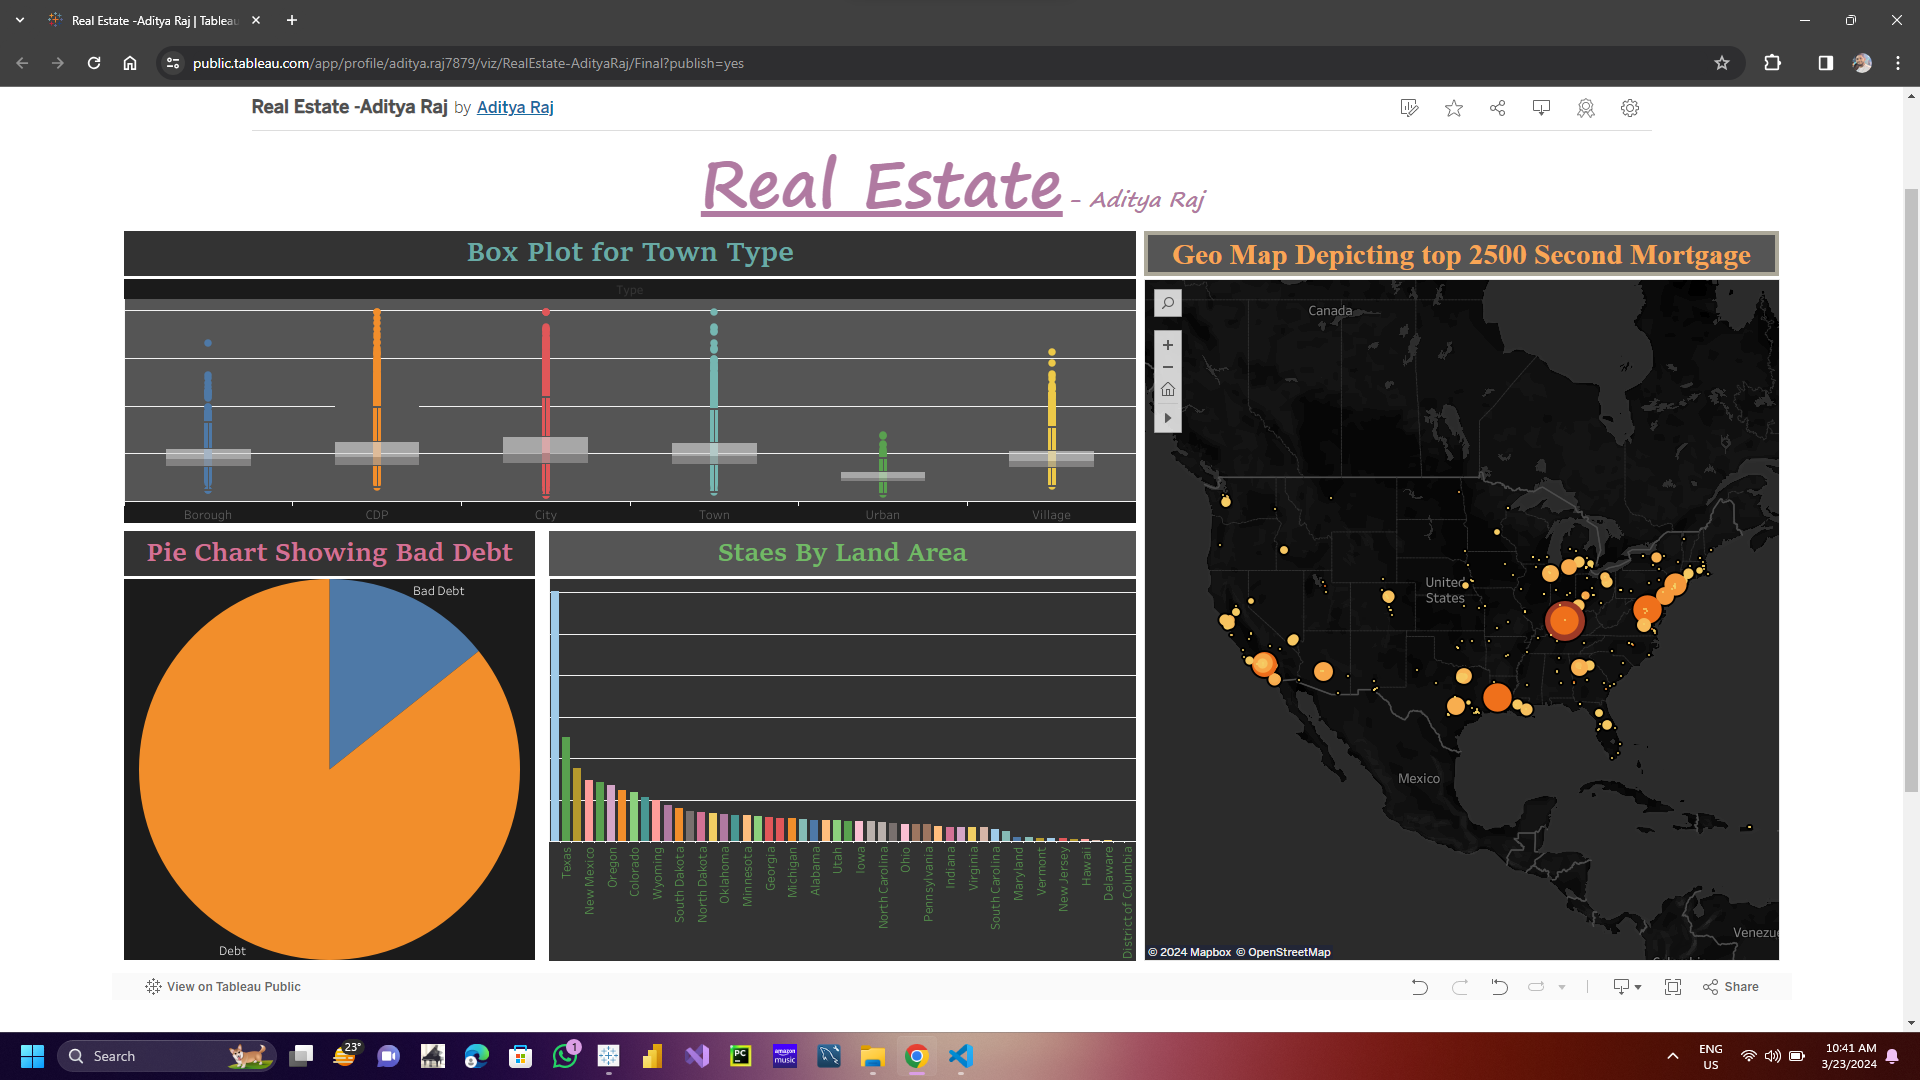

https://public.tableau.com/shared/F7YGFTR65?:display_count=n&:origin=viz_share_link

# Thank You for viewing the Real Estate Model Created by Aditya Raj